In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [174]:
## Read training data
train_data = pd.read_csv('datasets/train.csv', delimiter=',')
X = train_data.iloc[:,2:]
y = train_data.iloc[:,1]
X0 = pd.read_csv('datasets/train.csv', delimiter=',').iloc[:,2:]

In [175]:
## Check data
print("\n===== CHECK DATA =====")
print("TRAIN DATA")
print(train_data.head())
print("\n")
print("ORIGINAL FEATURES")
print(X.head())
print("\n")
print("TARGET")
print(y.head())


===== CHECK DATA =====
TRAIN DATA
   Id         y    x1    x2    x3    x4    x5
0   0 -6.822679  0.02  0.05 -0.09 -0.43 -0.08
1   1 -6.326290 -0.13  0.11 -0.08 -0.29 -0.03
2   2 -9.302728  0.08  0.06 -0.07 -0.41 -0.03
3   3 -7.371893  0.02 -0.12  0.01 -0.43 -0.02
4   4 -6.027647 -0.14 -0.12 -0.08 -0.02 -0.08


ORIGINAL FEATURES
     x1    x2    x3    x4    x5
0  0.02  0.05 -0.09 -0.43 -0.08
1 -0.13  0.11 -0.08 -0.29 -0.03
2  0.08  0.06 -0.07 -0.41 -0.03
3  0.02 -0.12  0.01 -0.43 -0.02
4 -0.14 -0.12 -0.08 -0.02 -0.08


TARGET
0   -6.822679
1   -6.326290
2   -9.302728
3   -7.371893
4   -6.027647
Name: y, dtype: float64


In [176]:
## Make the new features
# phi_j(x) = x_j

# Linear features are already the x1, ..., x5

# Quadratic features
X["x6"] = X["x1"]**2
X["x7"] = X["x2"]**2
X["x8"] = X["x3"]**2
X["x9"] = X["x4"]**2
X["x10"] = X["x5"]**2

# Exponential features
X["x11"] = np.exp(X["x1"])
X["x12"] = np.exp(X["x2"])
X["x13"] = np.exp(X["x3"])
X["x14"] = np.exp(X["x4"])
X["x15"] = np.exp(X["x5"])

# Cosine features
X["x16"] = np.cos(X["x1"])
X["x17"] = np.cos(X["x2"])
X["x18"] = np.cos(X["x3"])
X["x19"] = np.cos(X["x4"])
X["x20"] = np.cos(X["x5"])

# Constant
X["x21"] = 1

# Check new features
print("NEW FEATURES")
print(X.head())

NEW FEATURES


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21
0,0.02,0.05,-0.09,-0.43,-0.08,0.0004,0.0025,0.0081,0.1849,0.0064,...,1.051271,0.913931,0.650509,0.923116,0.999800,0.998750,0.995953,0.908966,0.996802,1
1,-0.13,0.11,-0.08,-0.29,-0.03,0.0169,0.0121,0.0064,0.0841,0.0009,...,1.116278,0.923116,0.748264,0.970446,0.991562,0.993956,0.996802,0.958244,0.999550,1
2,0.08,0.06,-0.07,-0.41,-0.03,0.0064,0.0036,0.0049,0.1681,0.0009,...,1.061837,0.932394,0.663650,0.970446,0.996802,0.998201,0.997551,0.917121,0.999550,1
3,0.02,-0.12,0.01,-0.43,-0.02,0.0004,0.0144,0.0001,0.1849,0.0004,...,0.886920,1.010050,0.650509,0.980199,0.999800,0.992809,0.999950,0.908966,0.999800,1
4,-0.14,-0.12,-0.08,-0.02,-0.08,0.0196,0.0144,0.0064,0.0004,0.0064,...,0.886920,0.923116,0.980199,0.923116,0.990216,0.992809,0.996802,0.999800,0.996802,1


In [177]:
## By hand estimations
# Split into train and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
#print(X_train.head())
#
# Train the linear regression model
#model = LinearRegression()
#model = Ridge(alpha=0.5)
#model = Lasso(alpha=0.01, fit_intercept=False)
#model.fit(X_train, y_train)
#
# Print coefficients
#print(model.coef_)
#
# Make predictions for the test dataset
#y_test_prediction = model.predict(X_test)
#print("RMSE: %.2e" %(np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction))))

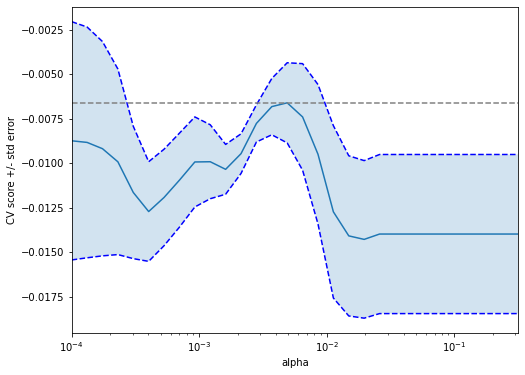

In [184]:
## Optimize Lasso regression parameter with a Grid Search
#  Re-used sample code at https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html
lasso = Lasso(max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 7   # 100 events per fold

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=True)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

# Make figure
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.savefig("alpha_grid_search.pdf")

In [179]:
## Best regression parameter alpha
alpha_best = alphas[np.argmax(scores)]
print("Best regression parameter: %.2e" %alpha_best)

Best regression parameter: 4.89e-03


In [180]:
## Train Lasso model for the best regression parameter on the whole dataset
model = Lasso(alpha=alpha_best, fit_intercept=False)
model.fit(X, y)
# Print coefficients
print(model.coef_)

[ 0.         -0.          0.          0.          0.         -0.
  0.          0.         -0.          0.         -0.0746826  -1.93682457
 -3.12487435 -0.11728164 -0.84355106 -0.01993135 -0.52849018 -0.
 -0.         -0.         -0.        ]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.563001293406614, tolerance: 3.0566464880308284
  model = cd_fast.enet_coordinate_descent(


In [181]:
## Make file to submit
file = open("to_submit.txt", "w") 
for coef in model.coef_:
    file.write(str(coef)+"\n")
file.close()

In [182]:
! cat to_submit.txt

0.0
-0.0
0.0
0.0
0.0
-0.0
0.0
0.0
-0.0
0.0
-0.07468260155993518
-1.936824573254832
-3.1248743538442834
-0.11728163869627166
-0.8435510559367696
-0.019931354353750753
-0.5284901751669261
-0.0
-0.0
-0.0
-0.0
